In [1]:
import csv
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime

csv.register_dialect(
    'myDialect',
    delimiter = ',',
    lineterminator = '\r\n',
    skipinitialspace = False,
    quotechar = '"'
)

def readFile(fileName):
    file=[]
    with open(fileName) as csvfile:
        filereader = csv.reader(csvfile, dialect='myDialect')
        for row in filereader:
            file.append(row)
            #print(row)
    return file

readFile('movie_metadata.csv')
for row in file:
    print row[23]
#file[0][23]



TypeError: 'type' object is not iterable

ValueError: incompatible sizes: argument 'height' must be length 0 or scalar

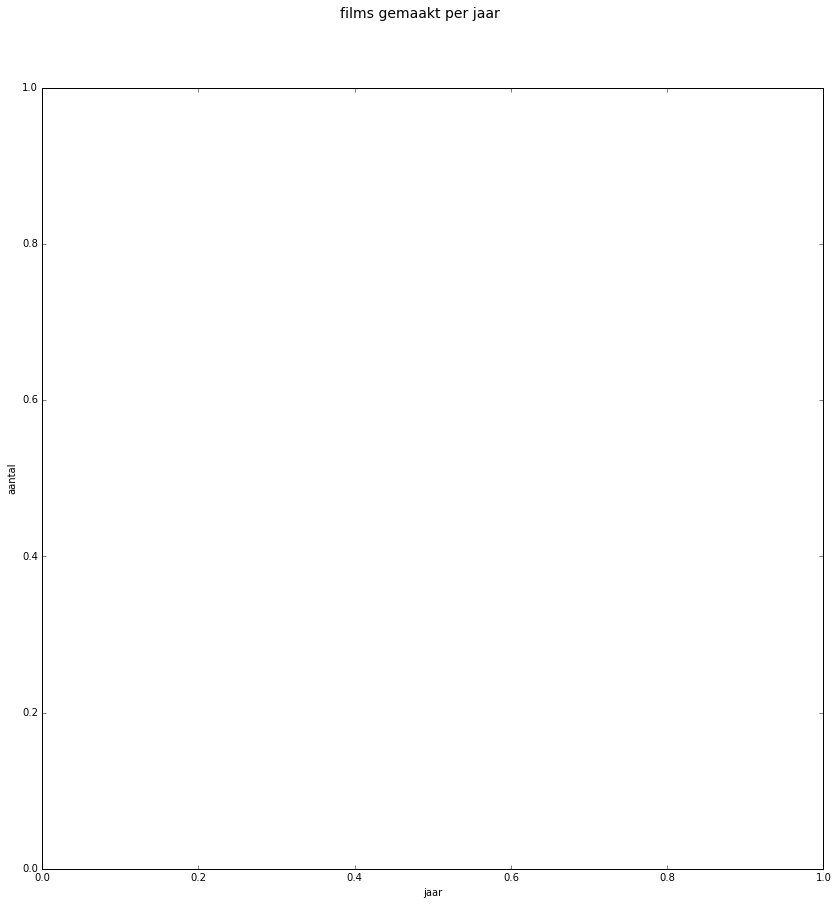

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = [i+1 for i in range(14)]
y_axis = []

for i in range(20):
    try:
        y_axis.append(file[i]['Jaar'])
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(14, 14))
fig.suptitle('films gemaakt per jaar', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('jaar')
ax.set_ylabel('aantal')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
plt.show()